In [1]:
#to import header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('heart.csv')
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
#before cleaning of the dataset from duplicate values the shape of the dataset is as follows
data.shape

(1025, 14)

In [6]:
print("Initial number of rows present in the dataset is ",data.shape[0])
print("Initial number of rows present in the dataset is ",data.shape[1])

Initial number of rows present in the dataset is  1025
Initial number of rows present in the dataset is  14


In [7]:
#presence of null values in the dataset 
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()
#this shows the dataset doesn't have null values in it

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#in order to check for duplicate values the following operation is done
data_drop = data.duplicated().any()
print(data_drop)

True


In [10]:
#the dataset has duplicate values in it hence these values have to be eliminated
data = data.drop_duplicates()
data.shape

(302, 14)

In [11]:
print("Final Number of rows in the dataset is ",data.shape[0])
print("Final Number of columns in the dataset is ",data.shape[1])

#it can be seen that the number of rows and columns before and after data cleaning is different

Final Number of rows in the dataset is  302
Final Number of columns in the dataset is  14


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [13]:
#this shows the count of people affected by heart disease
ctr1 = data[(data['target']==0)]
normal = ctr1.count()[1]
print("The number of healthy people are ",normal)

ctr2 = data[(data['target']==1)]
disease = ctr2.count()[1]
print("The number of people sufferring from heart disease are ",disease)

The number of healthy people are  138
The number of people sufferring from heart disease are  164


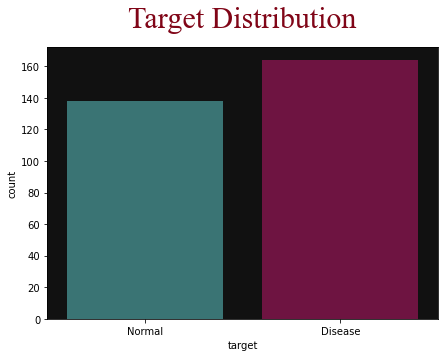

In [14]:
mypal= ['#488AC7', '#307D7E', '#254117','6F4E37', '#7D0541','#FF0000']
plt.figure(figsize=(7,5),facecolor='white')
graph=sn.countplot(x = 'target',data = data,palette=mypal[1::3])
graph.set_title('Target Distribution',fontsize=20, y=1.05,color='#800517',font='Times New Roman',size=30)
graph.set_facecolor('#111')
plt.xticks([0,1],['Normal','Disease'])
plt.show()

In [15]:
#to check whether males or females have higher heart diseases
data['sex'].value_counts()

#thus the male count is more than the female count

1    206
0     96
Name: sex, dtype: int64

([<matplotlib.axis.XTick at 0x1b5ba5a2a30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

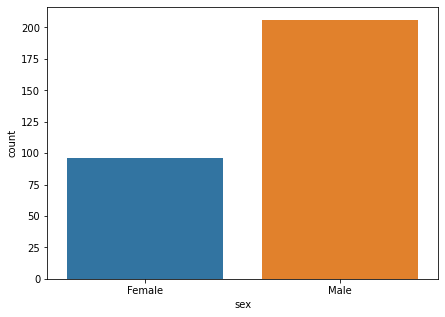

In [28]:
plt.figure(figsize=(7,5),facecolor='white')
sn.countplot(data['sex'])
plt.xticks([0,1],['Female','Male'])


In [17]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

<Figure size 1224x432 with 0 Axes>

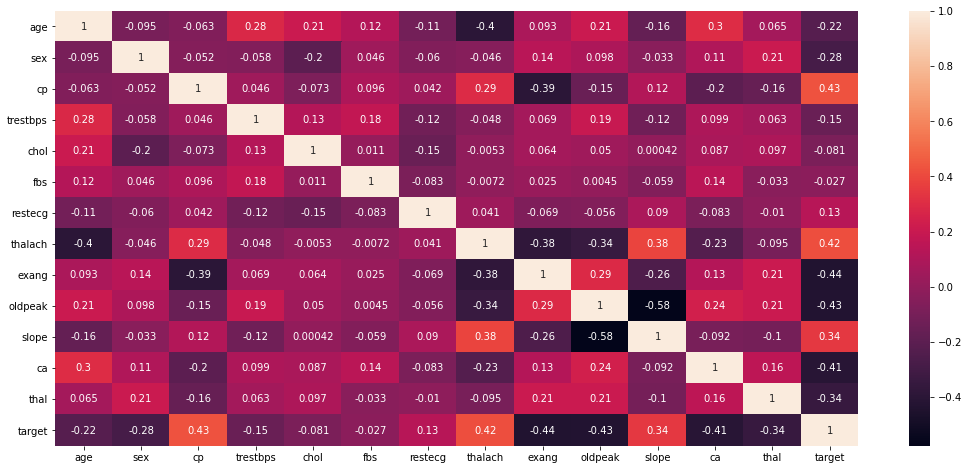

In [25]:
plt.figure(figsize=(17,6))
plt.figure(figsize=(18,8),facecolor='white')
sn.heatmap(data.corr(),annot=True)

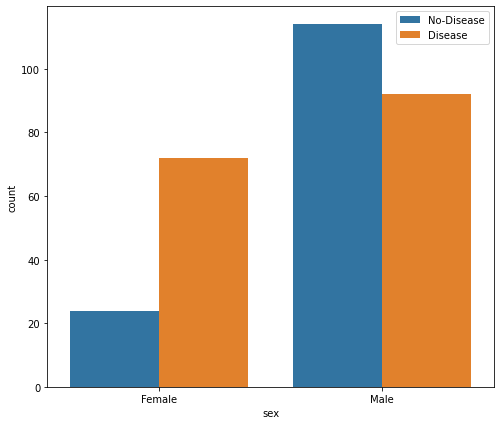

In [34]:
#gender distribution according to the target variable
plt.figure(figsize=(8,7),facecolor='white')
sn.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

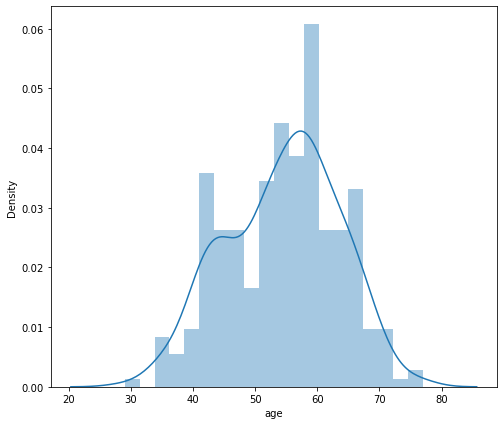

In [39]:
#check age distribution in dataset
plt.figure(figsize=(8,7),facecolor='white')
sn.distplot(data['age'],bins=20)
plt.show()

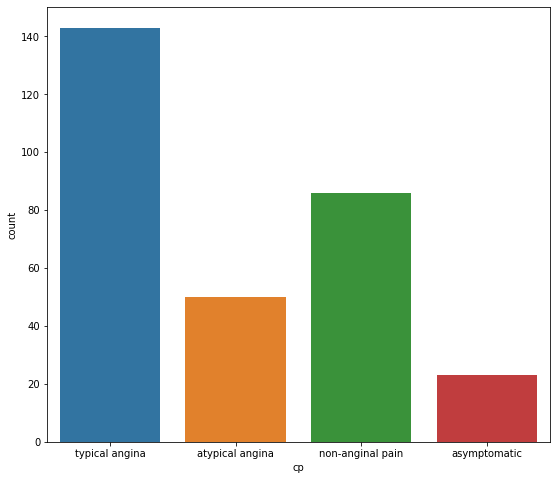

In [49]:
#check chest pain which is more common in ppl
plt.figure(figsize=(9,8),facecolor='white')
sn.countplot(data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()

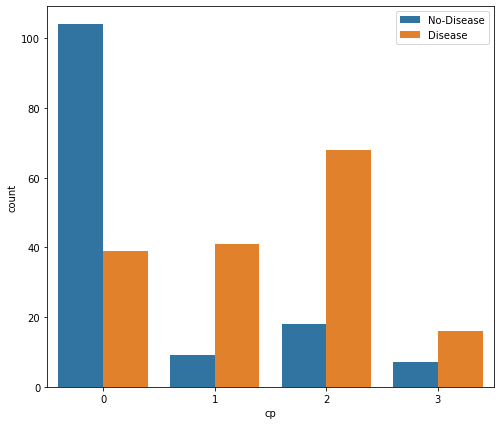

In [54]:
#show chest pain distribution as per target variable
plt.figure(figsize=(8,7),facecolor='white')
sn.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()


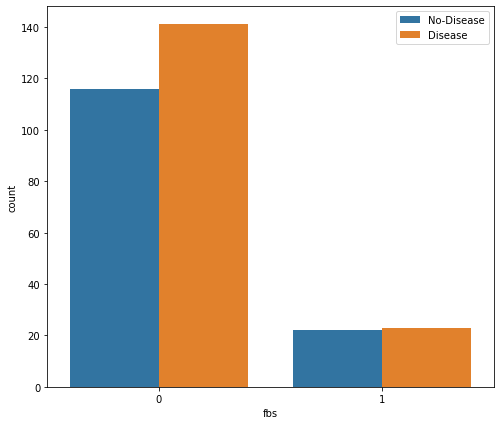

In [55]:
#fasting blood sugar distribution acc to target variable
plt.figure(figsize=(8,7),facecolor='white')
sn.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

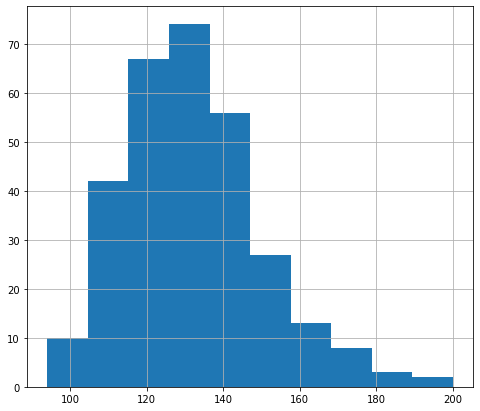

In [58]:
#check resting blood pressure distribution
plt.figure(figsize=(8,7),facecolor='white')
data['trestbps'].hist()
plt.show()

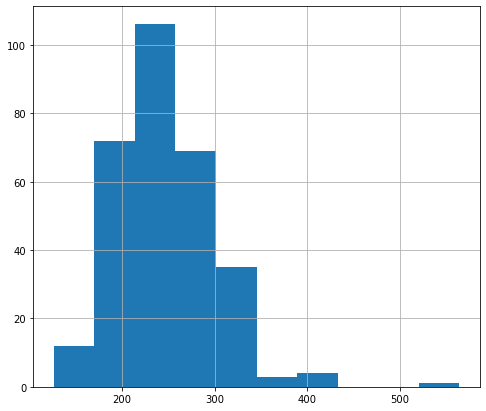

In [60]:
#show distribution serum cholestrol
plt.figure(figsize=(8,7),facecolor='white')
data['chol'].hist()
plt.show()

In [19]:
def splitdataset(data):
    X=data.values[:,0:12]
    Y=data.values[:,13]
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=100)
    return X, Y, X_train, X_test, y_train, y_test

def train_gini(X_train,X_test,y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
    
    clf_gini.fit(X_train, y_train)
    return clf_gini

def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def prediction(X_test,clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted Values:")
    print(y_pred)
    return y_pred

def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
    
def main():
    data = pd.read_csv("heart.csv")
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
    print("\n")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
    
    print("\n")
    print("-"*120)
    print("\n\n")
    
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
    
    print("\n")
    print("-"*120)
    print("\n\n")
    
if __name__ == "__main__":
    main()

Results Using Gini Index:


Predicted Values:
[1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
Confusion Matrix

In [33]:
predictors = data.drop('target',axis=1)
target = data['target']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.3, random_state=100)
print('X_Train = ',X_train.shape)
print('X_Test = ',X_test.shape)
print('Y_Train = ',Y_train.shape)
print('Y_Test = ',Y_test.shape)

X_Train =  (211, 13)
X_Test =  (91, 13)
Y_Train =  (211,)
Y_Test =  (91,)


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
score = round(accuracy_score(Y_pred,Y_test)*100,2)
print('Accuracy score using Logistic Regression is : '+str(score)+'%')

Accuracy score using Logistic Regression is : 81.32%


In [38]:
import pickle
#pickle is used for serialization = data to one specific model which is ready to use(DUMP)
#Deserialization = for loading that particular model(LOAD)
with open('test','wb') as files:
    pickle.dump(lr,files)#writing of file